In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [8]:
data = pd.read_csv('housing.csv')

In [9]:
##Explore dataset structure and variables
data.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [10]:
data.tail(2)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [11]:
data.shape

(545, 13)

In [12]:

# data informison
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
#fing the null value
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
# Get the column names
print(data.columns)

# Get the data types of each column
print(data.dtypes)

# Get a summary of the dataset
print(data.describe())

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.0000

In [15]:
#Clean data for missing values and outliers
import pandas as pd

# Load the dataset
housing_data = pd.read_csv('housing.csv')

# Display basic information about the dataset
print(housing_data.info())

# Handling missing values
# Check for missing values
missing_values = housing_data.isnull().sum()
print("Missing values:\n", missing_values)

# Impute missing values
# Assuming numerical columns will be imputed with median and categorical columns with mode
numerical_cols = housing_data.select_dtypes(include='number').columns
categorical_cols = housing_data.select_dtypes(exclude='number').columns

housing_data[numerical_cols] = housing_data[numerical_cols].fillna(housing_data[numerical_cols].median())
housing_data[categorical_cols] = housing_data[categorical_cols].fillna(housing_data[categorical_cols].mode().iloc[0])

# Handling outliers
# Identify outliers using z-score
from scipy import stats
z_scores = stats.zscore(housing_data[numerical_cols])
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).any(axis=1)
print("Number of outlier rows:", outlier_rows.sum())

# Remove outlier rows
housing_data = housing_data[~outlier_rows]

# Validate cleaned data
print("Cleaned data information:\n", housing_data.info())

# Save cleaned data
housing_data.to_csv('cleaned_housing.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0


In [3]:
###Visualize relationships between features and target variable


In [17]:
# Display the first few rows of thedata set
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


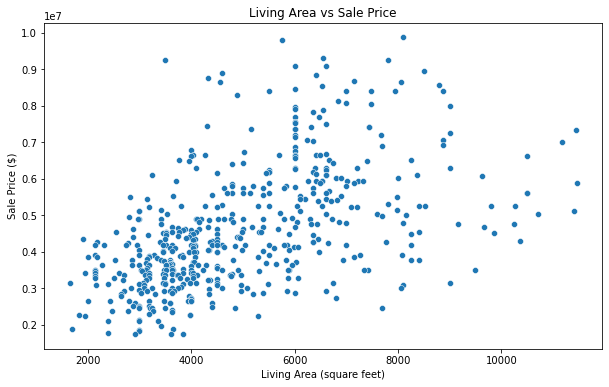

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=housing_data)
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area (square feet)')
plt.ylabel('Sale Price ($)')
plt.show()


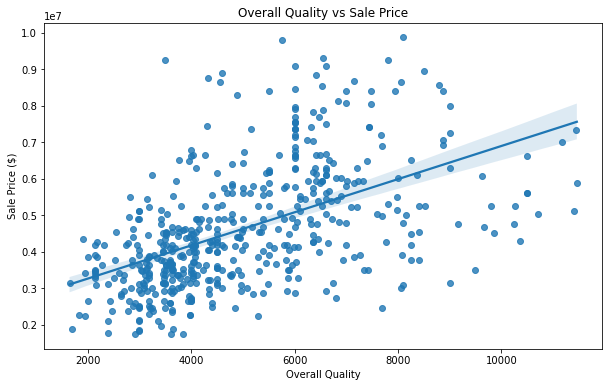

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='area', y='price', data=housing_data)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.show()


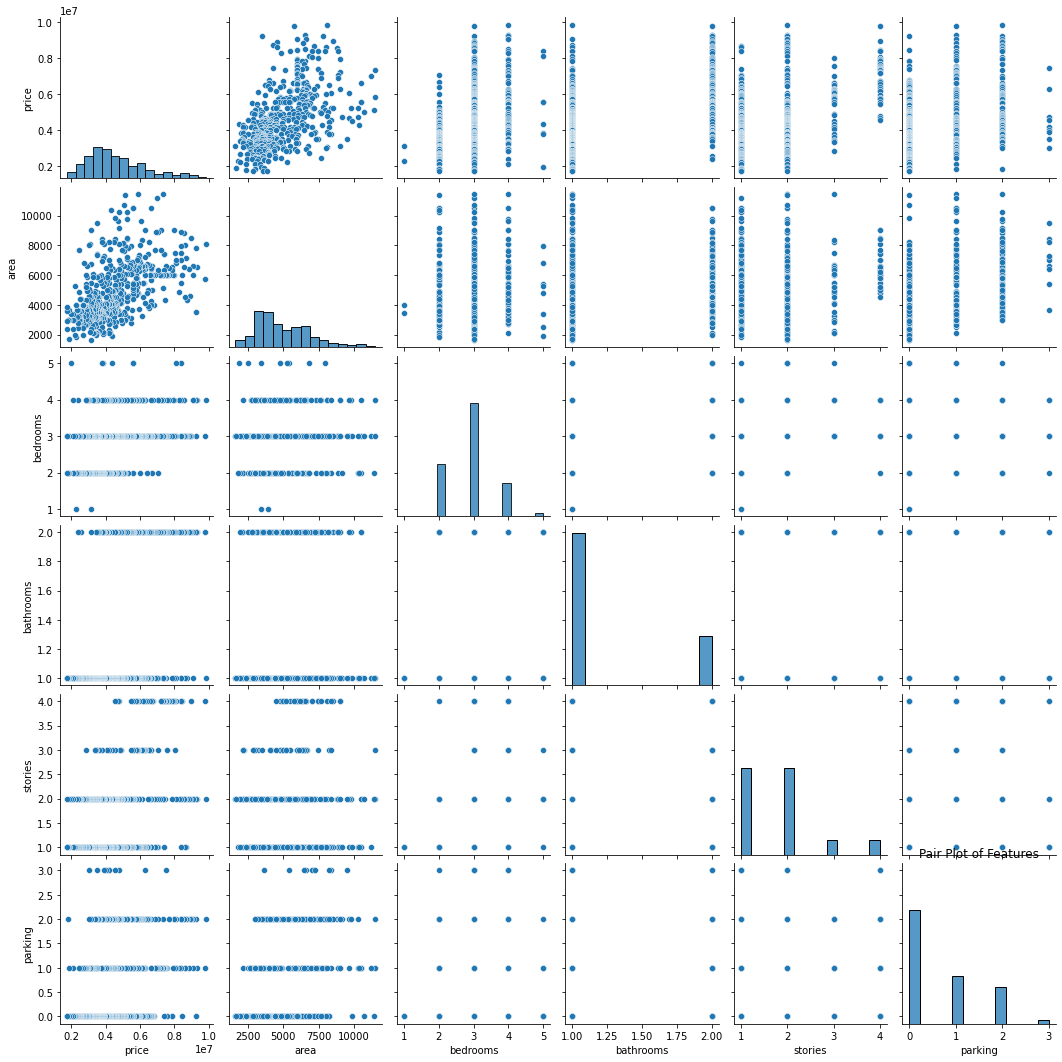

In [20]:
# Visualize relationships using pair plots
sns.pairplot(housing_data)
plt.title('Pair Plot of Features')
plt.show()



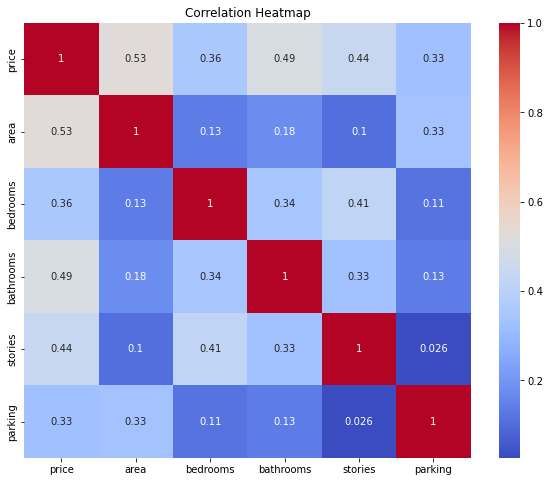

In [21]:
# Visualize relationships using correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Split data into training and testing sets
print(housing_data.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [23]:
# Define the column names
column_names = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                'parking', 'prefarea', 'furnishingstatus']

# Separate features (X) and target variable (y)
X = housing_data[column_names].drop(columns=['price'])  # Features
y = housing_data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (417, 12)
X_test shape: (105, 12)
y_train shape: (417,)
y_test shape: (105,)


In [24]:
#Train linear regression model on training data.

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the training data
data = {
    'price': [13300000, 12250000, 12250000, 12215000],
    'area': [7420, 8960, 9960, 7500],
    'bedrooms': [4, 4, 3, 4],
    'bathrooms': [2, 4, 2, 2],
    'stories': [3, 4, 2, 2],
    'mainroad': ['yes', 'yes', 'yes', 'yes'],
    'guestroom': ['no', 'no', 'no', 'no'],
    'basement': ['no', 'no', 'yes', 'yes'],
    'hotwaterheating': ['no', 'no', 'no', 'no'],
    'airconditioning': ['yes', 'yes', 'no', 'yes'],
    'parking': [2, 3, 2, 3],
    'prefarea': ['yes', 'no', 'yes', 'yes'],
    'furnishingstatus': ['furnished', 'furnished', 'semi-furnished', 'furnished']
}

#Evaluate model performance using metrics like Mean Squared Error (MSE) or R-squared = pd.DataFrame(data)

# Convert categorical variables to numerical using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Separate features (X) and target variable (y)
X_train = housing_data.drop(columns=['price'])  # Features
y_train = housing_data['price']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.32238787e+02  9.82246944e+04  8.80875274e+05  4.42292255e+05
  2.14448361e+05 -2.07820327e+05  2.07820327e+05 -1.91808308e+05
  1.91808308e+05 -1.32043624e+05  1.32043624e+05 -4.15911715e+05
  4.15911715e+05 -4.10640164e+05  4.10640164e+05 -2.83685177e+05
  2.83685177e+05  1.16444843e+05  1.31833414e+05 -2.48278257e+05]
Intercept: 1843729.588705529


In [26]:
# ALL DATA SET

import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the training data
housing_data = pd.read_csv('housing.csv')

# Convert categorical variables to numerical using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Separate features (X) and target variable (y)
X_train = housing_data.drop(columns=['price'])  # Features
y_train = housing_data['price']  # Target variable

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.44139386e+02  1.14787560e+05  9.87668107e+05  4.50848003e+05
  2.77107101e+05 -2.10636294e+05  2.10636294e+05 -1.50262930e+05
  1.50262930e+05 -1.75053452e+05  1.75053452e+05 -4.27723573e+05
  4.27723573e+05 -4.32479156e+05  4.32479156e+05 -3.25771900e+05
  3.25771900e+05  1.52526335e+05  1.06181715e+05 -2.58708051e+05]
Intercept: 1612172.663076749


In [27]:
#Evaluate model performance using metrics like Mean Squared Error (MSE) or R-squared

In [28]:
#Evaluate model performance using metrics like Mean Squared Error (MSE) or R-squared

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (replace 'housing.csv' with your dataset)
data = pd.read_csv("housing.csv")

# Check the columns in the dataset
print(data.columns)

# Identify categorical variables
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# Drop any rows with missing values
data = data.dropna()

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Assume 'Price' is the target variable and the rest are features
X = data.drop('bedrooms', axis=1)  # Features
y = data['bedrooms']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean Squared Error: 0.37778810663234313
R-squared: 0.22290503897180247


In [30]:
#Interpret coefficients to understand feature importance in predicting housing prices

In [31]:
# Check the columns in the dataset
print(data.columns)

# Verify that 'Price' is present in the columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming you have loaded the dataset into a pandas DataFrame called 'housing_data'
# Remove the 'furnishingstatus' column from the dataset if it exists
if 'furnishingstatus' in housing_data.columns:
    housing_data = housing_data.drop('furnishingstatus', axis=1)

# Check if the columns exist before selecting them
columns_to_keep = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    if col in housing_data.columns:
        columns_to_keep.append(col)

# X_train contains the features used for training the model
X_train = housing_data[columns_to_keep]

# y_train contains the target variable (housing prices)
y_train = housing_data['price']

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

# Interpretation of coefficients
for index, row in coefficients.iterrows():
    print(f"The coefficient for {row['Feature']} is {row['Coefficient']:.2f}")

# Additional analysis:
# You can also calculate the standardized coefficients if needed
standardized_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Standardized Coefficient': model.coef_ / np.std(X_train, axis=0)})
print(standardized_coefficients)

# Interpretation of standardized coefficients
for index, row in standardized_coefficients.iterrows():
    print(f"The standardized coefficient for {row['Feature']} is {row['Standardized Coefficient']:.2f}")


     Feature   Coefficient
0       area  3.311155e+02
1   bedrooms  1.678098e+05
2  bathrooms  1.133740e+06
3    stories  5.479398e+05
4    parking  3.775963e+05
The coefficient for area is 331.12
The coefficient for bedrooms is 167809.79
The coefficient for bathrooms is 1133740.16
The coefficient for stories is 547939.81
The coefficient for parking is 377596.29
             Feature  Standardized Coefficient
area            area              1.527180e-01
bedrooms    bedrooms              2.275737e+05
bathrooms  bathrooms              2.258409e+06
stories      stories              6.322167e+05
parking      parking              4.386600e+05
The standardized coefficient for area is 0.15
The standardized coefficient for bedrooms is 227573.74
The standardized coefficient for bathrooms is 2258408.65
The standardized coefficient for stories is 632216.67
The standardized coefficient for parking is 438659.98
